In [43]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
%matplotlib inline

import numpy as np
import pandas
from matplotlib import pyplot as plt
from pathlib import Path

In [49]:
_here = Path('.').resolve()
results_folder = _here / 'results/2/'

In [50]:
history = pandas.read_csv(results_folder / 'history.csv', index_col='epoch', dtype='float32')

In [51]:
def get_figsize(n_rows, n_cols):
    row_size = 8  # heigth
    column_size = 20  # width

    return (n_cols * column_size, n_rows * row_size)


def get_figa(n_rows, n_cols):
    fig, ax = plt.subplots(n_rows, n_cols, figsize=get_figsize(n_rows, n_cols))
    return fig, ax

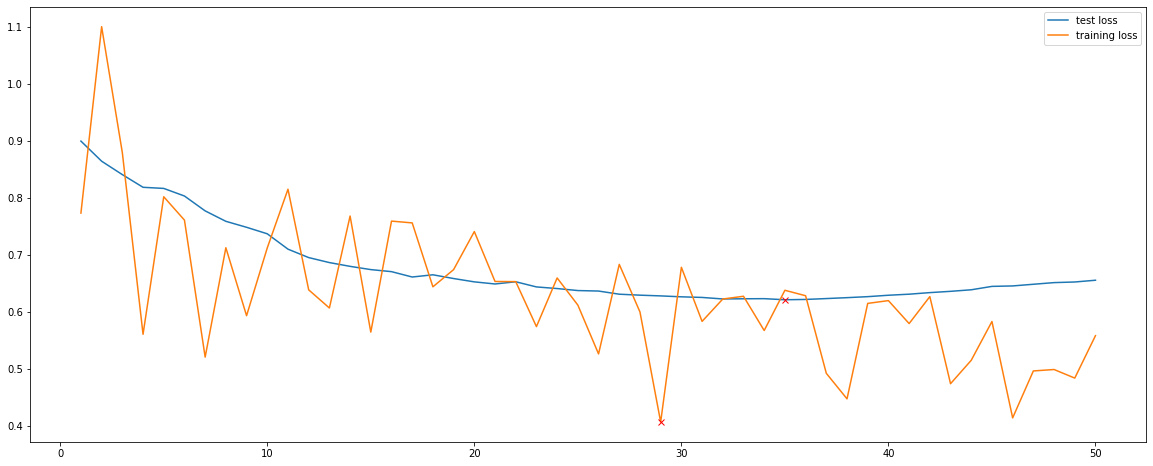

In [52]:
fig, axis = get_figa(1, 1)

for key in ['test loss', 'training loss']:
    axis.plot(history.index, history[key], label=key)

for key in ['test loss', 'training loss']:
    epoch = history.index[np.argmin(history[key])]
    axis.plot(epoch, np.min(history[key]), marker='x', color='r')

axis.legend()

plt.savefig(results_folder / 'history.png')